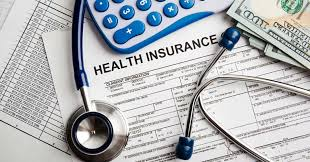

Health insurance is a type of coverage that **pays** for medical and surgical expenses incurred by the insured. It can also cover other forms of health-related costs, such as prescription drugs, preventive care, and mental health services. 

**Why Health Insurance is Important:**

- **Financial Protection:** Health insurance helps cover the high costs of medical care. Without it, individuals may face significant financial burdens from unexpected health issues or accidents.

- **Preventing Medical Bankruptcy:** Medical expenses are a leading cause of bankruptcy. Health insurance helps mitigate this risk by covering significant portions of medical bills.


## Objective of Analysis:

**Key Factors:** Identify key factors influencing the price of health insurance

**Customer Benefit Strategies:** Based on the insights, suggest ways customers can get a cheaper health insurance

You can find the dataset at : https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance

## Data Dictionary 

| Variable | Description |
| --- | --- |
| Age | The age of the person. | 
| Sex | Gender of the person. | 
| Bmi | Body Mass Index of the person. | 
| Children | Number of children the person has. | 
| Smoking | Smoking status of the person. | 
| Region | The region where the person lives. | 
| Charges | The charges of the insurance premium. | 


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline

In [66]:
df = pd.read_csv("Health_insurance.csv")

In [67]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
# Right of the bat , we can see 3 categorical (sex , smoker and region) and 4 numerical columns
# Categorical columns needs to be handled 
# Let's check it out anyway

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
df.shape

(1338, 7)

1338 rows and 7 columns

In [70]:
# Let's check out how many null values does this dataset have
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- This dataset has no null values. Good news!

In [71]:
# Let's check out the unique values in the columns
for col in df.columns.to_list():
    print()
    print(f"column name : {col}")
    print(df[col].unique())
    
    


column name : age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

column name : sex
['female' 'male']

column name : bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975

In [72]:
figure = px.histogram(df, x = "sex", color = "smoker", title= "Number of Smokers")
figure.show()

According to the above visualisation, 547 females, 517 males don’t smoke, and 115 females, 159 males do smoke

Text(0.5, 1.0, 'Distribution of age')

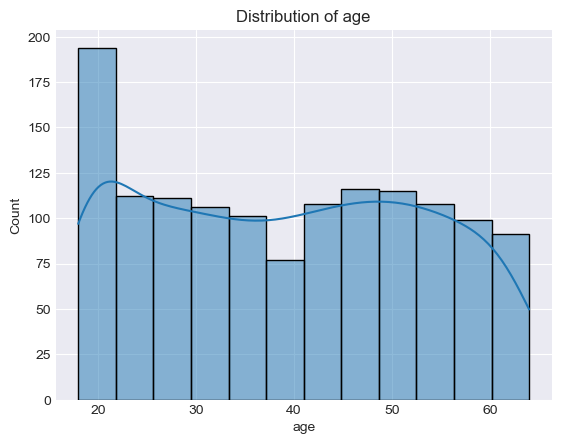

In [73]:
sns.histplot(df["age"] , kde = True)
plt.title("Distribution of age")

In [74]:
# Let's see some summary statistics for the numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Distribution of bmi')

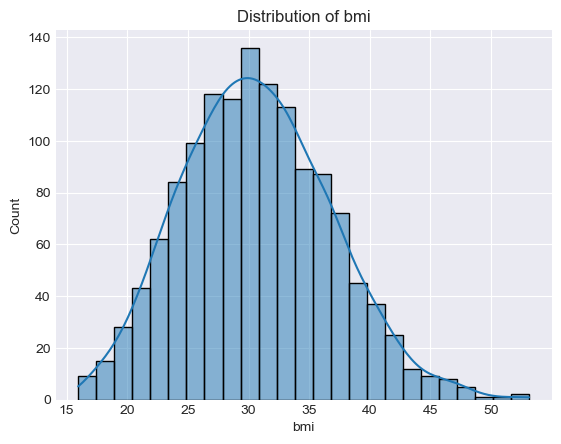

In [75]:
sns.histplot(df["bmi"] , kde = True)
plt.title("Distribution of bmi")

Text(0.5, 1.0, 'Distribution of children')

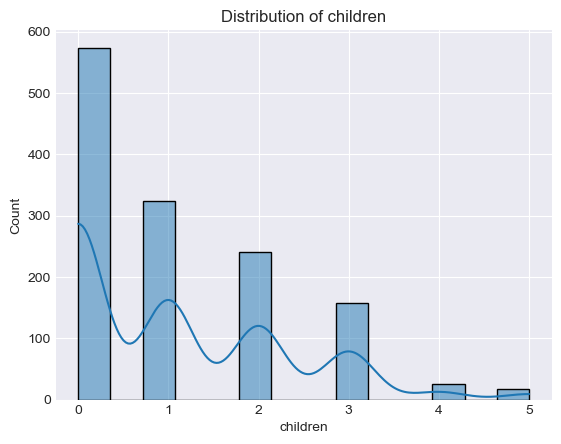

In [76]:
sns.histplot(df["children"] , kde = True)
plt.title("Distribution of children")

In [77]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
# Let's convert the categorical columns to a numerical column first 
from sklearn.preprocessing import LabelEncoder 

cat_columns = df.select_dtypes(include="object").columns
le = LabelEncoder()

for col in cat_columns:
    df[col] = le.fit_transform(df[col])
    
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### For references

- Southwest : 3
- Southeast : 2
- Northwest : 1
- Northeast : 0
    
- Female : 0
- Male : 1

- smoker : 1
- no smoker : 0

In [79]:
print(sorted(df["age"].unique().tolist()))

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


In [80]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [81]:
# Lets create binning for age and bmi columns 
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

# Define BMI bins and labels
bmi_bins = [0, 18.5, 25, 30, float('inf')]
bmi_labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']

# Create new columns for binned age and BMI
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
df['bmi_bin'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Lets create the mapping and drop the columns
age_bin_map = {'18-24': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55-64': 4}
df['age_bin'] = df['age_bin'].map(age_bin_map)

# Map BMI bins to numerical values
bmi_bin_map = {'Underweight': 0, 'Healthy Weight': 1, 'Overweight': 2, 'Obesity': 3}
df['bmi_bin'] = df['bmi_bin'].map(bmi_bin_map)

df.head()

,age,sex,bmi,children,smoker,region,charges,age_bin,bmi_bin
0,19,0,27.900,0,1,3,16884.92400,0,2
1,18,1,33.770,1,0,2,1725.55230,0,3
2,28,1,33.000,3,0,2,4449.46200,1,3
3,33,1,22.705,0,0,1,21984.47061,1,1
4,32,1,28.880,0,0,1,3866.85520,1,2


In [82]:
df.drop(columns = ["age" , "bmi"] , axis = 1 ,inplace = True)

Text(0.5, 1.0, 'sex vs charges')

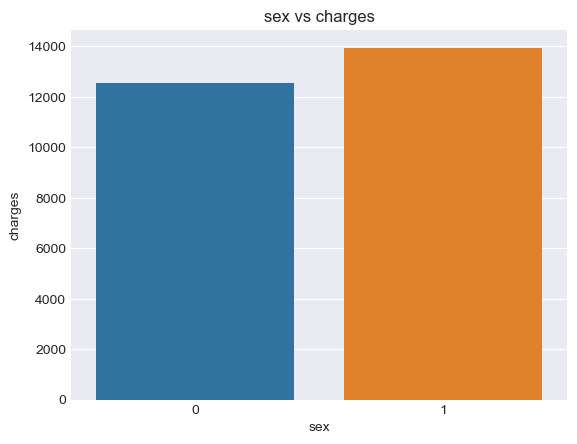

In [83]:
### Exploratory Data Analysis
sex_stats = df.groupby("sex")["charges"].mean().reset_index()
sns.barplot(x = "sex" , y = "charges" , data = sex_stats)
plt.title("sex vs charges")


- In general men pay a higher amount of insurance from this dataset which makes me suprised. As I thought women pay more insurance than man because of  regular frequency of gynecological exams at later stages, the effects of menopausal transitions, for example.

Text(0.5, 1.0, 'region vs charges')

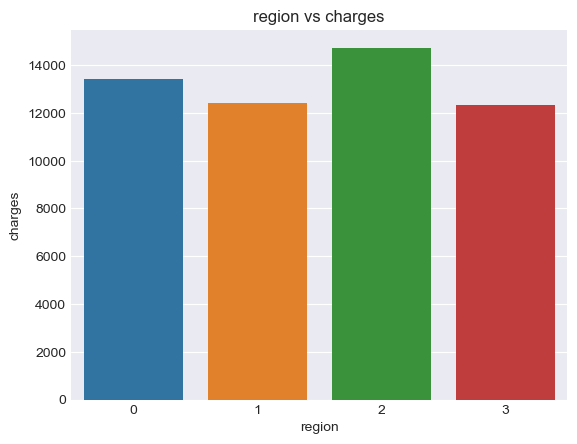

In [84]:
region_stats = df.groupby("region")["charges"].mean().reset_index()
sns.barplot(x = "region" , y = "charges" , data = region_stats)
plt.title("region vs charges")

Southwest : 3

Southeast : 2

Northwest : 1

Northeast : 0
    
- People from the south in general pay higher insurance premium

Text(0.5, 1.0, 'smoker vs charges')

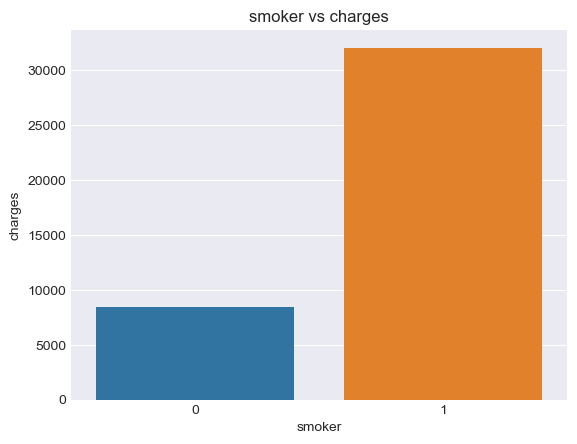

In [85]:
smoker_stats = df.groupby("smoker")["charges"].mean().reset_index()
sns.barplot(x = "smoker" , y = "charges" , data = smoker_stats)
plt.title("smoker vs charges")

-  As expected, people who smoke definitely pay more health insurance premium

Text(0.5, 1.0, 'children vs charges')

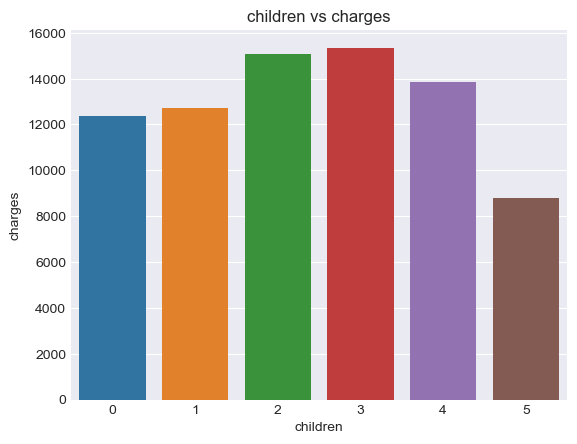

In [86]:
children_stats = df.groupby("children")["charges"].mean().reset_index()
sns.barplot(x = "children" , y = "charges" , data = children_stats)
plt.title("children vs charges")

Text(0.5, 1.0, 'age vs charges')

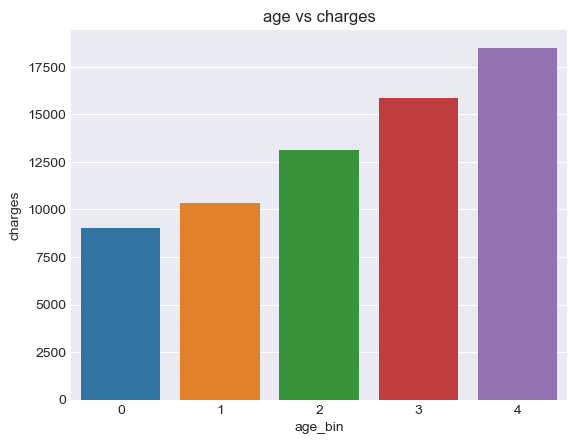

In [87]:
age_bin_stats = df.groupby("age_bin")["charges"].mean().reset_index()
sns.barplot(x = "age_bin" , y = "charges" , data = age_bin_stats)
plt.title("age vs charges")

- As expected, the older people pay higher insurance premium , because they would normally have more illnesses that insurance companies have to cover

Text(0.5, 1.0, 'bmi vs charges')

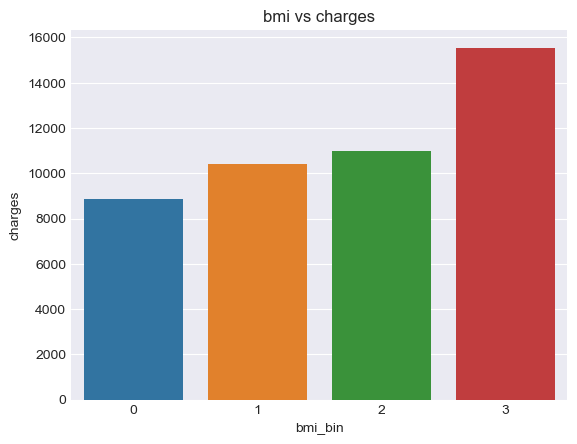

In [88]:
bmi_stats = df.groupby("bmi_bin")["charges"].mean().reset_index()
sns.barplot(x = "bmi_bin" , y = "charges" , data = bmi_stats)
plt.title("bmi vs charges")

- As expected, obese customers pay higher insurance premiums as they are more prone to heart diseases for example

<Axes: >

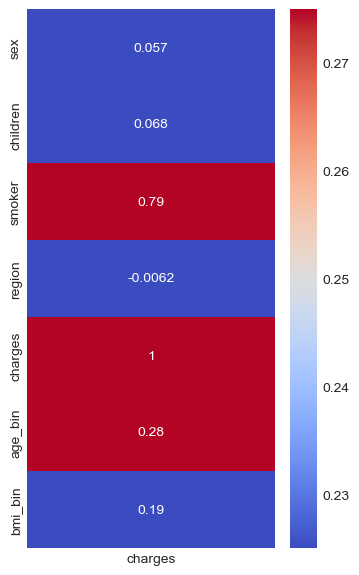

In [89]:
corr_matrix = df.corr()

plt.subplots(figsize = (4,7))
sns.heatmap(corr_matrix[["charges"]] , cmap = "coolwarm" , annot = True , vmax = 0.25, vmin = 0.25)

- It seems like almost all attributes especially age and smoker are important except for region

## Model Training

In [90]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

X = df.drop('charges', axis=1)  # Features
y = df['charges']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training features shape: (1070, 6)
Testing features shape: (268, 6)
Training target shape: (1070,)
Testing target shape: (268,)


In [91]:
# Converting it back to a dataframe because it is easier to work with the column names for the scaled features
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [92]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
}

# Dictionary to store metrics
metrics = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R2 Score': []
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Store metrics
    metrics['Model'].append(model_name)
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['R2 Score'].append(r2)

# Creating a DataFrame for metrics
metrics_df = pd.DataFrame(metrics)

# Display metrics
print(metrics_df)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



                         Model          MAE           MSE         RMSE  \
0            Linear Regression  4397.583654  3.555540e+07  5962.834692   
1             Ridge Regression  4399.084932  3.556464e+07  5963.609662   
2             Lasso Regression  4397.662435  3.555832e+07  5963.079850   
3      Decision Tree Regressor  3272.714405  3.557174e+07  5964.204791   
4      Random Forest Regressor  3123.748149  2.904385e+07  5389.234429   
5  Gradient Boosting Regressor  2629.770590  2.131681e+07  4617.012815   

   R2 Score  
0  0.770978  
1  0.770918  
2  0.770959  
3  0.770873  
4  0.812921  
5  0.862693  


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



C:\Users\User\AppData\Local\Temp\ipykernel_21760\39253592.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



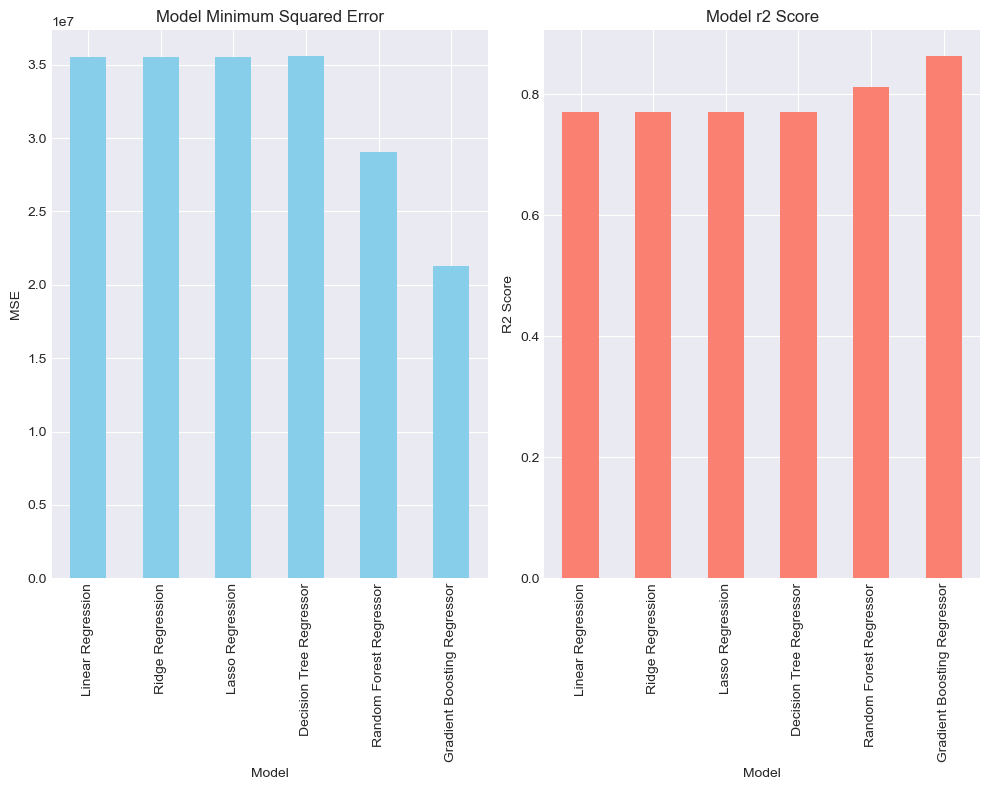

In [93]:
# Let's plot the MAEs and R2-Score to determine the best model to predict the charges
plt.style.use('seaborn-darkgrid')

fig , ax = plt.subplots(1,2,figsize = (10,8))

# Plot Accuracy
metrics_df.plot(x='Model', y='MSE', kind='bar', ax=ax[0], color='skyblue', legend=False)
ax[0].set_title('Model Minimum Squared Error')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Model')

# Plot F1 Score
metrics_df.plot(x='Model', y='R2 Score', kind='bar', ax=ax[1], color='salmon', legend=False)
ax[1].set_title('Model r2 Score')
ax[1].set_ylabel('R2 Score')
ax[1].set_xlabel('Model')

plt.tight_layout()

- This clearly shows that , the Gradient Boosting Regressor is the best ensemble method to perform the prediction of charges

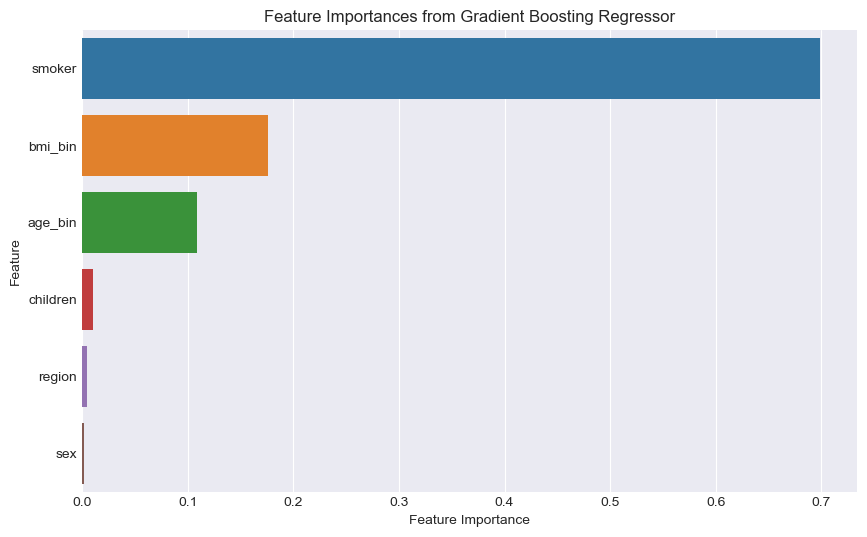

In [94]:
# Import Features for Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)

# Extract feature importances
feature_importances = model.feature_importances_

# A DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': feature_importances
})

# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.show()

## Smoking , Bmi and Age are important factors for predicting health insurance preimum charges

## Suggestions:

**1. Quit smoking**:
    - Quitting smoking reduces health risks and the likelihood of smoking-related diseases.
    - Many insurers offer discounts or lower premiums to non-smokers. 

**2. Maintain Healthy BMI**:
    - Achieving and maintaining a healthy weight can reduce the risk of various health issues associated with high BMI like
      cardiovascular diseases.

**3. Get it Early**:
    - Get a health insurance as young as you can to get cheaper rates
    -Different insurers offer varying plans and premium rates. Comparing different plans can help find the best rate for similar coverage.

### Let's try doing visualizations of the final dataset in Power Bi

In [95]:
df.to_csv('health_dataframe.csv')